# K-Nearest Neighbors
> KNN(K — Nearest Neighbors) é um dos muitos algoritmos ( de aprendizagem supervisionada ) usado no campo de data mining e machine learning, ele é um classificador onde o aprendizado é baseado “no quão similar” é um dado (um vetor) do outro. O treinamento é formado por vetores de n dimensões.

> Por exemplo, em um consultório médico, o especialista, a partir do conjunto de sintomas que descrevem o estado de saúde do paciente pode procurar, em fichas médicas de pacientes já diagnosticados, conjuntos de sintomas similares a este, no intuito de auxiliar no diagnóstico de determinada doença.

> **Diga-me com quem andas e eu te direi quem tu és**

> **Funcionamento**
  - Utiliza a similaridade entre os K pontos mais próximos do dataset para estimar o valor das novas obersavações.
  - O processamento é feito no momento da previsão e, por isso é chamado de "Aprendizado Preguiçoso" - isso pode ser muito custoso em dataset maiores e em modelos que é preciso uma previsão de forma imediata.
  - KNN em encaixa com variaveis em escalas diferentes.
  - **Etapas**
        — Recebe um dado não classificado;
        — Mede a distância (Euclidiana, Manhattan, Minkowski ou Ponderada) do novo; dado com todos os outros dados que já estão classificados;
        — Obtém as X(no caso essa variável X é o parâmetro K) menores distâncias;
        — Verifica a classe de cada da um dos dados que tiveram a menor distância e conta a quantidade de cada classe que aparece;
        — Toma como resultado a classe que mais apareceu dentre os dados que tiveram as menores distâncias;
        — Classifica o novo dado com a classe tomada como resultado da classificação
  - **Calculo da distância**
    - Distância Euclidiana
      - 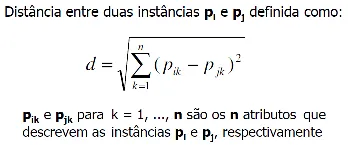

In [ ]:
# Bibliotecas
import pandas as pd

In [ ]:
data = {
    'A' : [1,1.5,2,1.5,-1,-0.5,0,-0.5],
    'A2' : [-0.5,0,-0.5,-1,1.5,2,1.5,1],
    'B' : [1,1.5,1,0.5,-1,-0.5,-1,-1.5],
    'B2' : [-1.5,-1,-0.5,-1,0.5,1,1.5, 1],
    'y' : [1,1,1,1,0,0,0,0],
    'y2' : [0,0,0,0,1,1,1,1]
}

data = pd.DataFrame(data)
data.head(3)

,A,A2,B,B2,y,y2
0,1.0,-0.5,1.0,-1.5,1,0
1,1.5,0.0,1.5,-1.0,1,0
2,2.0,-0.5,1.0,-0.5,1,0


In [ ]:
data_pred = {
    'A' : [2.5,1.8,0.5,-1,-1],
    'A2' : [2,1,0,0,-1.5],
    'B' : [2.5,1.8,0.5,-1,-1],
    'B2' : [2,1,0,0,-1.5],
}

data_pred = pd.DataFrame(data_pred)

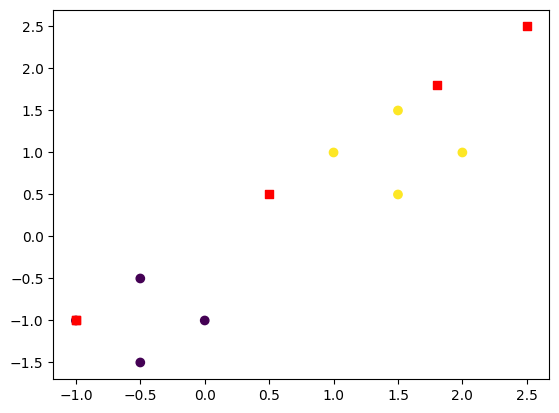

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x=data.A,y=data.B,c=data.y, cmap='viridis')
ax.scatter(x=data_pred.A,y=data_pred.B, c='r', marker='s')
plt.show()

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
X_train = data[['A', 'B']]
y_train = data.y

X_test = data_pred[['A', 'B']]


In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
y_test = clf.predict(X_test)

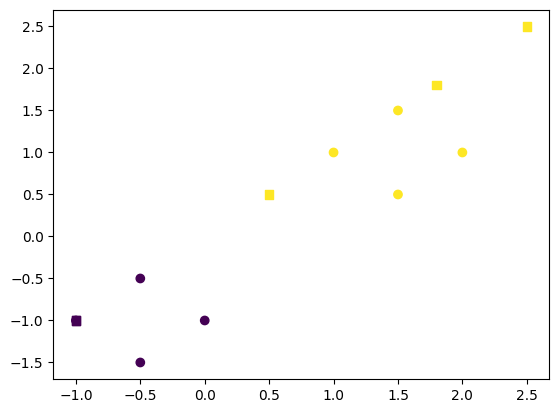

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x=data.A,y=data.B,c=data.y, cmap='viridis')
ax.scatter(x=data_pred.A,y=data_pred.B, c=y_test, marker='s')
plt.show()

In [51]:
# Dataset Iris
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [54]:
iris1 = iris_df.loc[iris_df.target.isin([1,2]), ['petal length (cm)',	'petal width (cm)', 'target']]

In [55]:
iris1.head(3)

,petal length (cm),petal width (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1


In [66]:
X = iris1[['petal length (cm)',	'petal width (cm)']]
y = iris1.target

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

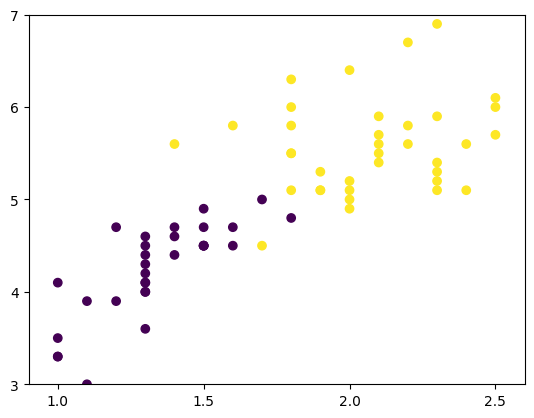

In [71]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x=X_train['petal width (cm)'],y=X_train['petal length (cm)'],c=y_train, cmap='viridis')
ax.set(xlim=(0.9, 2.6), xticks=[1,1.5,2,2.5], ylim=(3,7), yticks=[3,4,5,6,7])

plt.show()

In [72]:
# KNN
clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [74]:
# Verificando resultados
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 6,  8]])